# Pandas Cleaner Tutorial 

Welcome To pandas-cleaner tutorial. 

This notebook presents the main features offered by the pandas-cleaner package through simple examples.

In [68]:
%reload_ext autoreload
%autoreload 2

try:
    import pdcleaner
except ModuleNotFoundError:
    print("extended path variable")
    import sys
    sys.path.append('..')
    import pdcleaner

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=0)

In [75]:
my_series = pd.Series(['2022-10-01', '2021-06-11', '2019-04-03',' 2020-09-25'])
my_series= pd.to_datetime(my_series)
my_detector = my_series.cleaner.detect.date_range(lower='2020-06-15', upper='2022-08-05')
my_detector.is_error()


0     True
1    False
2     True
3    False
dtype: bool

In [76]:
my_detector.report()

                               Detection report                               
Method:                   date_range      Nb samples:                        4
Date:                  March 31,2022      Nb errors:                         2
Time:                       16:29:24      Nb rows with NaN:                  0
------------------------------------------------------------------------------
lower                     2020-06-15      upper                     2022-08-05
inclusive                       both      


In [67]:
import datetime
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

pandas.core.indexes.datetimes.DatetimeIndex

## The data

In this tutorial, we will be using a small dataset represnting some round fruits/vegetables. Each entry figures the type of product, its price, its diameter, its weight, its family and its pesticide content. 

The data used in this tutorial is an artificial dataset. To produce the dataset, we, first, created an initial dataset using the notebook *create_data.ipynb* (c.f. *clean_data.csv*). Then, additional errors were manually introduced to produce *data.csv*. 

In [3]:
data = pd.read_csv("data/fruits_data.csv", index_col=0)

In [4]:
data.head(10)

,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
0,navet,NaN,13.4,0.760,0.00525,de Nancy
1,pomme,-2.53,6.5,0.095,0.00571,"granny,"
2,pomme,2.96,6.9,0.153,0.00860,golden
3,Pomme,2.23,63.0,0.112,0.00473,Granny
4,pomme,3.18,8.9,0.304,0.00390,granny
5,pomme,4.85,7.6,212.000,0.00567,granny
6,pomme,4.43,6.6,0.126,0.00465,granny
7,pomme,55.00,6.0,0.102,0.00594,granny
8,cerise,7.30,2.7,0.006,0.00710,bigarrau
9,cerise,7.24,2.1,0.002,0.00000,amarelles


These few 10 rows of the dataset already contain 9 errors. Can you spot them ?

Over these few first rows, we observe that there are multiple errors in the dataset.
For instance:
- The first row, describes a turnip (un navet) which is a vegetable and, therefore, should not be included in a dataset of fruits. 
- The second row, contains two errors: 
    - On one hand, the indicated price is negative.
    - On the other hand, the variety contains a comma.
- The fourth row, contains three errors: 
    - First, unlike other entries, "Pomme" is spelled with a capital p.
    - Second, this row indicates an apple (une pomme) whose diameter is 63cm which is clearly an error (maybe it was meant to be in mm).
    - Finally, "Granny" starts with a capital letter unlike other entries of the variety column.
- Row 6 describes a giant apple whose weight is 212 kg.
- Row 8 indicates a price of 55€ for a kg of apples.
- Finally, "bigarreaux" is missplled as "bigarrau" in row 9.
    
It is clear that even for such a small dataset, spotting and correcting the errors is hard to do. So, one can only imagine how tedious it can be when large datasets are involved.

## Basic Usage

The package offers three main functionalities :
- Detecting potential errors in pandas dataframes
- Analysing the detected errors
- Cleaning the detected errors

The following example considers the previously introduced dataset. 

Here is a typical call sequence to pandas-cleaner:

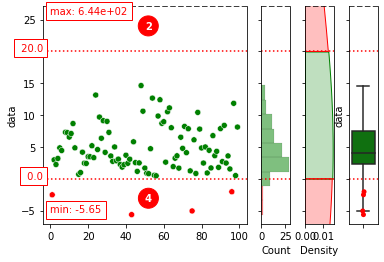

,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
0,navet,NaN,13.4,0.760,0.00525,de Nancy
2,pomme,2.96,6.9,0.153,0.00860,golden
3,Pomme,2.23,63.0,0.112,0.00473,Granny
4,pomme,3.18,8.9,0.304,0.00390,granny
5,pomme,4.85,7.6,212.000,0.00567,granny
...,...,...,...,...,...,...
94,pomme,3.58,8.7,0.282,0.00735,golden
95,pomme,1.53,8.9,0.290,0.00741,granny
97,cerise,11.85,2.1,0.003,0.00502,amarelles
98,pomme,0.49,7.1,0.157,0.00622,golden


In [5]:
# detect errors
detector = data["price(euro)"].cleaner.detect('bounded', lower=0., upper=20.)
#alternatively, detector = data["price(euro)"].cleaner.detect.bounded(lower=0., upper=20.)

# visualize the errors
detector.plot(compact=True)
plt.show()

#clean the dataframe
cleaner_df = data.cleaner.clean(detector_obj=detector, method="drop")
#alternativey, cleaner_df = data.cleaner.clean.drop(detector_obj=detector)
cleaner_df

### Train and Test Data

If we have two distinct datasets : a train set and a test set, we can transfer the knowledge we have learnt from the initial train data to clean the test data:

In [6]:
def split_data(all_data_df, train_fraction, random_state=None):
    if not ( 0 < train_fraction < 1):
        raise ValueError("train_fraction must be strictly between 0 and 1")
    
    shuffle_df = all_data_df.sample(frac=1, random_state=random_state)

    train_size = int(train_fraction * len(all_data_df))

    train_set = shuffle_df[:train_size].copy(deep=True)
    test_set = shuffle_df[train_size:].copy(deep=True)
    
    return train_set, test_set

train_df, test_df = split_data(data, train_fraction=0.8, random_state=0)

In [7]:
train_df.head(5)

,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
26,cerise,9.69,1.0,0.000,0.00706,bigarreaux
86,cerise,6.77,2.6,0.005,0.00419,bigarreaux
2,pomme,2.96,6.9,0.153,0.00860,golden
55,navet,0.54,9.0,0.242,0.00504,DE NANCY
75,cerise,-5.07,1.9,0.002,0.00000,amarelles


In [8]:
test_df.head(5)

,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
25,pomme,4.58,8.5,0.287,0.00651,golden
37,pomme,2.24,9.4,0.700,0.00508,granny
81,pomme,2.46,6.6,0.134,0.00770,granny
46,pomme,1.15,6.3,0.115,0.00822,granny
39,navet,2.20,4.2,0.052,0.00642,de Milan


Parametrising (fitting) the detector according to the train data.

In [9]:
# on train set
print(f"shape of train data {train_df.shape}")
train_detector = train_df["pesticide_content(mg/kg)"].cleaner.detect('iqr')
print(f"computed bounds : {train_detector.lower}, {train_detector.upper}")
#print("plot...")
#train_detector.plot()
#plt.show()
print(train_detector.detected)
train_df.cleaner.clean("drop", train_detector, inplace=True)
print(f"new shape of train data {train_df.shape}")
train_df

shape of train data (80, 6)
computed bounds : 0.0013362499999999998, 0.009406250000000001
75     0.000000
30     0.000000
22     0.000000
76     0.000445
90     0.011000
74     0.000000
41     0.000000
15     0.000000
38     0.000000
10     0.009920
85     0.000000
14    56.000000
20     0.000000
Name: pesticide_content(mg/kg), dtype: float64
new shape of train data (67, 6)


,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
26,cerise,9.69,1.0,0.000,0.00706,bigarreaux
86,cerise,6.77,2.6,0.005,0.00419,bigarreaux
2,pomme,2.96,6.9,0.153,0.00860,golden
55,navet,0.54,9.0,0.242,0.00504,DE NANCY
93,pomme,2.46,8.9,0.304,0.00848,granny
...,...,...,...,...,...,...
98,pomme,0.49,7.1,0.157,0.00622,golden
69,cerise,6.52,2.1,0.002,0.00594,amarelles
94,pomme,3.58,8.7,0.282,0.00735,golden
72,pomme,4.09,7.9,0.222,0.00486,golden


transferring the parameters to the testing detector. 

shape of test data (20, 6)
plot...


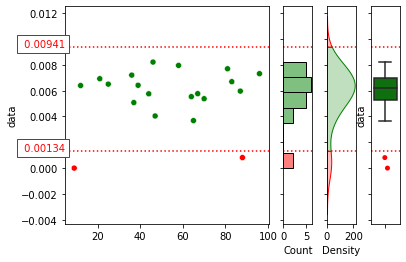

88    0.000814
9     0.000000
Name: pesticide_content(mg/kg), dtype: float64
new shape of test data (18, 6)


,category,price(euro),diameter(cm),weight(kg),pesticide_content(mg/kg),variety
25,pomme,4.58,8.5,0.287,0.00651,golden
37,pomme,2.24,9.4,0.700,0.00508,granny
81,pomme,2.46,6.6,0.134,0.00770,granny
46,pomme,1.15,6.3,0.115,0.00822,granny
39,navet,2.20,4.2,0.052,0.00642,de Milan
65,navet,1.90,10.1,0.334,0.00368,de Nancy
58,cerise,12.41,2.8,0.008,0.00796,bigarreaux
12,cerise,8.67,1.5,0.002,0.00640,amarelles
70,pomme,4.77,5.9,0.077,0.00538,golden
87,pomme,3.62,8.5,0.269,0.00597,golden


In [10]:
#on test set
print(f"shape of test data {test_df.shape}")
test_detector = test_df["pesticide_content(mg/kg)"].cleaner.detect(train_detector)
print("plot...")
test_detector.plot()
plt.show()
print(test_detector.detected)
test_df.cleaner.clean("drop", test_detector, inplace=True)
print(f"new shape of test data {test_df.shape}")
test_df

Note that the bounds indicated on the plot concerning test data are the same bounds we have computed on the train set.

If we had simply created a new 'iqr' detector, the bounds would have been recalculated using only the test data. 

## Detecttion

Detection refers to identifiying the entries that are invalid in the data. 
Multiple Detector objects and detection methods are available in pandas-cleaner to allow for the detection of different types of errors.

The first step in the detection process is to initialize a detector object that will detect the errors present in the Series. This step is performed using the detect() method. Actually, the detect method simply instantiates a detector objects. The actual detection is performed each time a query is executed.

Here's how :
```(python)
<series>.cleaner.detect(<detector_name>, <detector_params>)
```

or alternatively:
```(python)
<series>.cleaner.detect.<detector_name>(<detector_params>)
```

The method returns an error if the detection method is not recognized.

Hereafter, we use a bounded detector as a simple illustration example.

Please note that nan values are considered as legitimate values and are not reported as errors.

### Numerical Data

For now, pandas-cleaner handles two types of numerical data:
- bounded distributions
- Gaussian distributions

#### Bounded Values

The bounded detection method detects values from a series that are out of some specified bounds. By default, the bounds are set to -inf and +inf.

In the considered dataset, the price column contains different values. We already observed that some of these values are negative. One can suppose that the prices must be in a specific range. Say, for example, between 0 and 30.

If we set a lower bound to 0 and an upper bound to 30, negative prices will be flagged as errors so are prices higher than 30€.

In [11]:
bounded_detector = data["price(euro)"].cleaner.detect('bounded', lower=0., upper=30)
#alternatively:
# bounded_detector = data["price(euro)"].cleaner.detect.bounded(lower=0., upper=30)

bounded_detector.detected

1      -2.53
7      55.00
14    644.00
43     -5.65
75     -5.07
96     -2.05
Name: price(euro), dtype: float64

#### Gaussian Distribution

In [12]:
s_gaussian = data["pesticide_content(mg/kg)"]

##### IQR

The IqrSeriesDetector makes use of the IQR (Inter Quantile Range) to detect the allowed values and the erroneous ones.
If we note Q25 as the 25th percentile and Q75 as the 75th percentile, then the values outside of the range 
$$ [Q25 - threshhold * IQR \quad,\quad Q75 + threshhold * IQR ] $$
are considered as errors. 

In [13]:
iqr_detector = s_gaussian.cleaner.detect('iqr', threshold=1.5)

print(f"Q25 : {iqr_detector.q25}")
print(f"Q75 : {iqr_detector.q75}")
print(f"IQR : {iqr_detector.iqr}")

print(f"lowest allowed value : {iqr_detector.lower}" )
print(f"highest allowed value : {iqr_detector.upper}" )

iqr_detector.detected

Q25 : 0.0044875
Q75 : 0.0067075
IQR : 0.0022199999999999998
lowest allowed value : 0.0011575000000000005
highest allowed value : 0.0100375


9      0.000000
14    56.000000
15     0.000000
20     0.000000
22     0.000000
30     0.000000
38     0.000000
41     0.000000
74     0.000000
75     0.000000
76     0.000445
85     0.000000
88     0.000814
90     0.011000
Name: pesticide_content(mg/kg), dtype: float64

##### Quantiles

The QuantilesSeriesDetector considers a lower and an upper quantile as parameters.
Values that are outside of the range determined by the quantiles are considered as errors.

In [14]:
quantiles_detector = s_gaussian.cleaner.detect('quantiles', lowerq=0.1, upperq=0.9)

print(f"lower quantile : {quantiles_detector.lowerq}")
print(f"value at the lower quantile : {quantiles_detector.lower}")
print(f"upper quantile : {quantiles_detector.upperq}")
print(f"value at the upper quantile : {quantiles_detector.upper}")

quantiles_detector.detected

lower quantile : 0.1
value at the lower quantile : 0.00040050000000000014
upper quantile : 0.9
value at the upper quantile : 0.007971


2      0.00860
9      0.00000
10     0.00992
11     0.00807
14    56.00000
15     0.00000
19     0.00831
20     0.00000
22     0.00000
30     0.00000
38     0.00000
41     0.00000
46     0.00822
61     0.00852
74     0.00000
75     0.00000
85     0.00000
90     0.01100
92     0.00832
93     0.00848
Name: pesticide_content(mg/kg), dtype: float64

### Categorical Data

Pandas-cleaner offers multiple detection methods that can handle categorical data. these can help detect and treat errors over object data. For the considered dataset, these could be useful to handle errors in the category and variety columns.

In [15]:
s_categorical = data["category"]

#### Values

The ValuesSeriesDetector considers a list of allowed values. Entries that are not in the given list are considered as errors.

For example, the considered dataset is supposed to include only fruits. However, some rows concern turnip (navet) which is a vegetable not a fruit. We can use the ValuesSeriesDetector to only allow specific values for example apples ("pomme") and cherries ("cerise")

In [16]:
values_detector = s_categorical.cleaner.detect('values', values_list=["pomme", "cerise"])

print(f"allowed values : {values_detector.values_list}")

values_detector.detected

allowed values : ['pomme', 'cerise']


0     navet
3     Pomme
15    navet
16    navet
18    navet
35    navet
38    navet
39    navet
41    navet
45    navet
52    navet
55    navet
56    navet
61    navet
65    navet
83    navet
Name: category, dtype: object

#### Value Counts

The ValueCountsSeriesDetector considers that the values that appear only a few times are errors. For that, a minimum occurence value is given. Only values that appear more than the indicated minimum occurence number are considered as not erroneous. This emanates from the assumption that rare data are most likely errors.

In [17]:
# values frequencies
s_categorical.value_counts()

pomme     48
cerise    36
navet     15
Pomme      1
Name: category, dtype: int64

In [18]:
counts_detector = s_categorical.cleaner.detect('counts', n=15)

print(f"allowed values : {counts_detector.values_list}")

print(f"erroneous entries :\n{counts_detector.detected}")

allowed values : ['pomme', 'cerise']
erroneous entries :
0     navet
3     Pomme
15    navet
16    navet
18    navet
35    navet
38    navet
39    navet
41    navet
45    navet
52    navet
55    navet
56    navet
61    navet
65    navet
83    navet
Name: category, dtype: object


#### Values Frequency

The ValuesFreqSeriesDetector considers the frequencies of values in the pandas object. That is the ratio between the number of appearances of a value and the total number of non-missing data.
Given a minimum frequency, values that appear in the dataframe with a lower frequency are considered as errors.  

In [19]:
# values frequencies
s_categorical.value_counts(normalize=True)

pomme     0.48
cerise    0.36
navet     0.15
Pomme     0.01
Name: category, dtype: float64

In [20]:
frequency_detector = s_categorical.cleaner.detect('freq', freq=0.15)

print(f"allowed values : {frequency_detector.values_list}")

frequency_detector.detected

allowed values : ['pomme', 'cerise']


0     navet
3     Pomme
15    navet
16    navet
18    navet
35    navet
38    navet
39    navet
41    navet
45    navet
52    navet
55    navet
56    navet
61    navet
65    navet
83    navet
Name: category, dtype: object

#### Patterns

The PatternSeriesDetector detects errors based on a regex pattern. Entries that do not match the specified pattern are considered as errors.

This provides multiple opportunities to test the values present in a series.

Here we suppose that the variety entries are alphabetic, start with a lower case and may include spacing caracters:

In [21]:
pattern_detector_1 = data["variety"].cleaner.detect('pattern', pattern=r"[a-z][a-zA-Z\s]*", mode="fullmatch")
pattern_detector_1.detected

1       granny,
3        Granny
18    de, Milan
29      golden2
38     de.Milan
45     Milan de
55     DE NANCY
Name: variety, dtype: object

Note that multiple matching modes are available and can be parametrised using the **mode** argument. The default mode is *match* which checks if there is a match to the regex at the beginning of the string.

In the following, we simply change the matching mode and the 'golden2' entry becomes allowed.

In [22]:
pattern_detector_1 = data["variety"].cleaner.detect('pattern', pattern=r"[a-z][a-zA-Z\s]*", mode="match")
pattern_detector_1.detected

3       Granny
45    Milan de
55    DE NANCY
Name: variety, dtype: object

the regular expression checks are case sensitive by default. The **case** argument allows to ignore case-sensitivity.

In the following, changing the case argument to *False* allows to consider the 'Granny' entry as allowed.

In [23]:
pattern_detector_1 = data["variety"].cleaner.detect('pattern', pattern=r"[a-z][a-z\s]*", case=False, mode="fullmatch")
pattern_detector_1.detected

1       granny,
18    de, Milan
29      golden2
38     de.Milan
Name: variety, dtype: object

#### Key Collision

When dealing with datasets that contain text entries, it is frequent to have either some entries that are misspelled or a few values that are not exactly equal but that refer to the same thing.

In the considered dataset, the text column *variety* provides an example of such data column. It indicates the variety of the fruit and therefore has a few possible values. To help with data analysis entries referring to a same variety should be indentical. However, the variety "de Milan" for example is written differently through the dataset ("de Milan", "de milan", "de, Milan", "Milan de" and "de.Milan"). 

The KeyCollisionSeriesDetector detects entries that may be alternative spellings of the same thing. 

In [24]:
keycollision_detector = data["variety"].cleaner.detect('keycollision', keys="fingerprint")
print("Entries that have detected alternative representations")
keycollision_detector.detected

Entries that have detected alternative representations


1       granny,
3        Granny
18    de, Milan
29      golden2
38     de.Milan
41     de milan
45     Milan de
55     DE NANCY
Name: variety, dtype: object

For now, key collision uses a fingerprint algorithm that is mainly effective with punctuation and case-sensitivity issues. Misspelling errors might be considered as different entries and may not be detected by the algorithm. 

The dictionary of the detected fingerprints and their considered representation can be listed using the following instruction:

In [25]:
keycollision_detector.dict_keys

{'de nancy': 'de Nancy',
 'granny': 'granny',
 'golden': 'golden',
 'bigarrau': 'bigarrau',
 'amarelles': 'amarelles',
 'bigarreaux': 'bigarreaux',
 'de milan': 'de Milan'}

## Errors Information

Once the error detector is initialized, multiple queries can be performed to analyse the series and get information about the errors present in the data.

### Error Report

In [26]:
# generate an error report
errors_report = bounded_detector.report()
print("The error report : \n\n", errors_report)

The error report : 

 bounded : 6 errors detected among 100 samples 
1      -2.53
7      55.00
14    644.00
43     -5.65
75     -5.07
96     -2.05
Name: price(euro), dtype: float64


### Number of errors

In [27]:
# number of errors
print("The series contains %d errors" % bounded_detector.n_errors)

The series contains 6 errors


### List Detected errors

the errouneous entries can be extracted using the method detected illustrated below. Alternatively, they can be retrieved using is_error or not_error (which allows simply to retrieve valid entries).

In [28]:
bounded_detector.detected

1      -2.53
7      55.00
14    644.00
43     -5.65
75     -5.07
96     -2.05
Name: price(euro), dtype: float64

### Error Indicators

it is possible to print a boolean series representing if a given entry was detected as error or not.
The methods is_error and not_error allow doing so: 

In [29]:
# indicate if row is erroneous
bounded_detector.is_error()

0     False
1      True
2     False
3     False
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Length: 100, dtype: bool

In [30]:
# indicate if row is correct
bounded_detector.not_error()

0      True
1     False
2      True
3      True
4      True
      ...  
95     True
96    False
97     True
98     True
99     True
Length: 100, dtype: bool

## Visualization

### Numerical series

Pandas-cleaner offers a plotting method for numerical detectors.
It plots a visualization of the data contained in the treated series:
a scatter plot of the data,
the distribution of the data (histogram and kde),
and a boxplot.

The coloring emphasizes the erroneous data. In addition, two horizontal lines delimit the allowed values. 

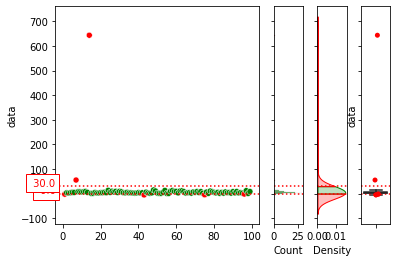

In [31]:
axs = data["price(euro)"].cleaner.detect('bounded', lower=0., upper=30).plot()

In the preceding graph, outliers make the plot much less interesting : interest points are ravelled and the distribution very dense. To focus on interest valid data points, the **compact** argument can be set to *True*  allowing to better visualize the data distribution, ommitting outiliers and explicitly displaying the number of errors.

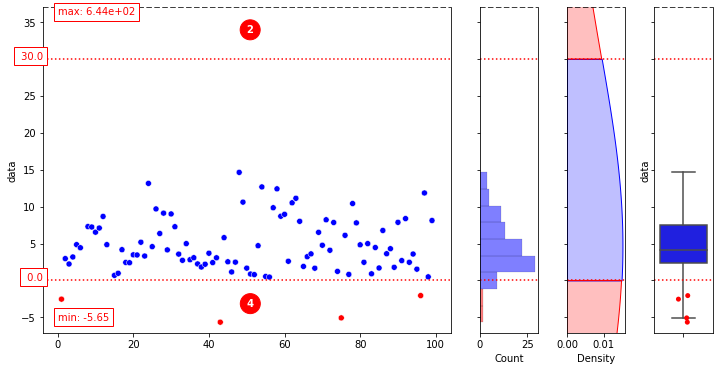

In [32]:
axs = data["price(euro)"].cleaner.detect('bounded', lower=0., upper=30)\
                    .plot(color='blue', errors_color='red', compact=True, limits=True, figsize=(12,6))

### Key Collision

Pandas-cleaner offers a plotting method for the keycollision detector as well.
This makes it easier to visualize the different legal values detected by the keycollision algorithm and how many different representations there are for each legal value.

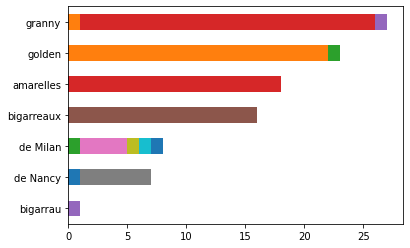

In [33]:
axs = data["variety"].cleaner.detect('keycollision').plot()

The graph makes it easy to visualize the legal values. This helps to both explore the dataset and evaluate the relevance of the keycollision algorithm. 

Here, we can easily see, for example, that the "granny" entry was represented with three distinct values.
The graph also shows the values kept by the keycollision algorithm. For instance, we can note that the key collision algorithm failed to spot the misspelling of "bigarrau" and considered it as a distinct legal value while it should have replaced it with "bigarreaux".

The plotting method offers options to compact the graph and focus on some part of the data by plotting only a given number of most and least frequent entries:

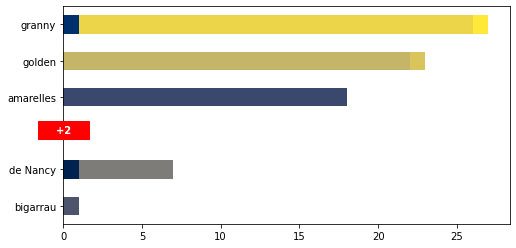

In [34]:
axs = data["variety"].cleaner.detect('keycollision')\
                    .plot(cmap='cividis', not_displayed_color='red', nfirst=3, nlast=2, figsize=(8,4))

## Cleaning

Pandas-cleaner offers multiple methods to clean the detected errors. These can be listed by running :
```(python)
pdcleaner.series_cleaning_methods.keys()
```

The cleaning methods are used to replace the detected errors with more relevent values.
Cleaning methods can be called on dataframes even if the detection methods were initially applied on a column of the dataframe. 
The replacement can be done inplace by modifying the same pandas object, or by creating a modified copy of it.

Note that nan values are not considered as errors and are kept intact.

### Clip
For bounded detectors, clipping refers to replacing the detected errors with the bounds. Thus, if a value is too high it will be replaced by the highest value allowed, while low values will be replaced by the minimum value allowed.

In [35]:
print(f"lowest value allowed : {quantiles_detector.lower}")
print(f"highest value allowed : {quantiles_detector.upper}")
s_gaussian.cleaner.clean(detector_obj=quantiles_detector, method="clip")[quantiles_detector.index]

lowest value allowed : 0.00040050000000000014
highest value allowed : 0.007971


2     0.007971
9     0.000401
10    0.007971
11    0.007971
14    0.007971
15    0.000401
19    0.007971
20    0.000401
22    0.000401
30    0.000401
38    0.000401
41    0.000401
46    0.007971
61    0.007971
74    0.000401
75    0.000401
85    0.000401
90    0.007971
92    0.007971
93    0.007971
Name: pesticide_content(mg/kg), dtype: float64

### To Na
Pandas-cleaner allows to simply replace the values indicating errors with Na values.
This may make the errors easier to spot and homogenize the process of treating both Na values and errors in the data. This also allows treating errors with methods like fillna.

In [36]:
s_gaussian.cleaner.clean(detector_obj=quantiles_detector, method="to_na")[quantiles_detector.index]

2    NaN
9    NaN
10   NaN
11   NaN
14   NaN
15   NaN
19   NaN
20   NaN
22   NaN
30   NaN
38   NaN
41   NaN
46   NaN
61   NaN
74   NaN
75   NaN
85   NaN
90   NaN
92   NaN
93   NaN
Name: pesticide_content(mg/kg), dtype: float64

### Replacement
The replacement cleaning method allows replacing detected errors with a specified value.
This method can be seen as an equivalent of fillna but in the case of detected errors. 

In the following example we compute the median and replace errors with it.

In [37]:
median_value = s_gaussian.median()
print(f"median value to replace with : {median_value}")
s_gaussian.cleaner.clean(detector_obj=quantiles_detector, value=median_value, method="replace")[quantiles_detector.index]

median value to replace with : 0.00557


2     0.00557
9     0.00557
10    0.00557
11    0.00557
14    0.00557
15    0.00557
19    0.00557
20    0.00557
22    0.00557
30    0.00557
38    0.00557
41    0.00557
46    0.00557
61    0.00557
74    0.00557
75    0.00557
85    0.00557
90    0.00557
92    0.00557
93    0.00557
Name: pesticide_content(mg/kg), dtype: float64

### Drop
Pandas-cleaner allows to drop entries containing errors in a similar way to dropna.
The following code snippet removes the rows that have errors from the series.

In [38]:
s_gaussian.cleaner.clean(detector_obj=quantiles_detector, method="drop")

0     0.00525
1     0.00571
3     0.00473
4     0.00390
5     0.00567
       ...   
95    0.00741
96    0.00732
97    0.00502
98    0.00622
99    0.00632
Name: pesticide_content(mg/kg), Length: 80, dtype: float64

### Keys

This cleaning method is mainly used with the key collision detector. It replaces values that have multiple representations by a single value.

For example, in this dataset we had detected a few values that had alternative representations:

In [39]:
keycollision_detector.detected

1       granny,
3        Granny
18    de, Milan
29      golden2
38     de.Milan
41     de milan
45     Milan de
55     DE NANCY
Name: variety, dtype: object

These can be replaced by their most frequent representation :

In [40]:
data["variety"].cleaner.clean(detector_obj=keycollision_detector, method="bykeys")[keycollision_detector.index]

1       granny
3       granny
18    de Milan
29      golden
38    de Milan
41    de Milan
45    de Milan
55    de Nancy
Name: variety, dtype: object

### Cleaning Inplace

most cleaning method support cleaning the data inplace by modifying directly the treated dataframe or series. This can be simply done using the argument `inplace=True` in most cleaning methods.

Here's an example:

In [41]:
series_copy =  s_gaussian.copy()
series_copy.head()

0    0.00525
1    0.00571
2    0.00860
3    0.00473
4    0.00390
Name: pesticide_content(mg/kg), dtype: float64

#### Returning a New Series When Cleaning 

In [42]:
print("Here's the clean series:")
print(series_copy.cleaner.clean.to_na(detector_obj=quantiles_detector)[quantiles_detector.index])
print("And the original series is kept intact: ")
print(series_copy[quantiles_detector.index])

Here's the clean series:
2    NaN
9    NaN
10   NaN
11   NaN
14   NaN
15   NaN
19   NaN
20   NaN
22   NaN
30   NaN
38   NaN
41   NaN
46   NaN
61   NaN
74   NaN
75   NaN
85   NaN
90   NaN
92   NaN
93   NaN
Name: pesticide_content(mg/kg), dtype: float64
And the original series is kept intact: 
2      0.00860
9      0.00000
10     0.00992
11     0.00807
14    56.00000
15     0.00000
19     0.00831
20     0.00000
22     0.00000
30     0.00000
38     0.00000
41     0.00000
46     0.00822
61     0.00852
74     0.00000
75     0.00000
85     0.00000
90     0.01100
92     0.00832
93     0.00848
Name: pesticide_content(mg/kg), dtype: float64


#### Cleaning Series Inplace 

In [43]:
series_copy.cleaner.clean.to_na(detector_obj=quantiles_detector, inplace=True)
print("The series was cleaned inplace:")
series_copy[quantiles_detector.index]

The series was cleaned inplace:


2    NaN
9    NaN
10   NaN
11   NaN
14   NaN
15   NaN
19   NaN
20   NaN
22   NaN
30   NaN
38   NaN
41   NaN
46   NaN
61   NaN
74   NaN
75   NaN
85   NaN
90   NaN
92   NaN
93   NaN
Name: pesticide_content(mg/kg), dtype: float64